In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import cv2
from keras.models import load_model
from keras.preprocessing import image
from matplotlib import pyplot as plt

Using TensorFlow backend.




0
[0]
1
[1]
2
[2]


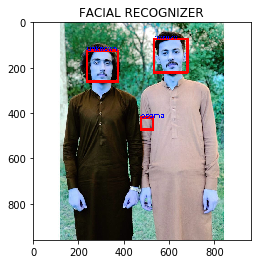

In [2]:
model=load_model('Model/model.bin')

face_haar_cascade=cv2.CascadeClassifier('Cascade Classifier/haarcascade_frontalface_default.xml')

test_img=cv2.imread("2.jpg")

faces_detected=face_haar_cascade.detectMultiScale(test_img,scaleFactor=1.3,minNeighbors=5)

for(x,y,w,h) in faces_detected:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=10)
    roi_gray=test_img[y:y+w,x:x+h] # Cropping Face From The Frame Captured
    img=cv2.resize(roi_gray,(48,48))
    img=img.reshape(img.shape[0],img.shape[1],-1)
    img=img.reshape(-1,img.shape[0],img.shape[1],img.shape[2])
    max_index=np.argmax(model.predict(img))
    print(max_index)
    print(model.predict_classes(img))
    emotions=('hamza','osama','unknown')

    predicted_emotion=emotions[max_index]
    
    cv2.putText(test_img,predicted_emotion,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)

# resized_img=cv2.resize(test_img,(1000,700))
# cv2.imshow('FACIAL EMOTION DETECTION',resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(test_img)
plt.title('FACIAL RECOGNIZER')
plt.show()